Intercept (w0): 0.9414477459248298
Slope (w1): [[1.33716718 1.33265106 1.33090207 1.3339355  1.33127268 1.33228083
  1.33291329 1.33570014 1.33379965 1.3328403  1.33437922 1.33245145
  1.33465024 1.33162766 1.33193873 1.33361602 1.33453733 1.33116819
  1.33433629 1.33580433]]


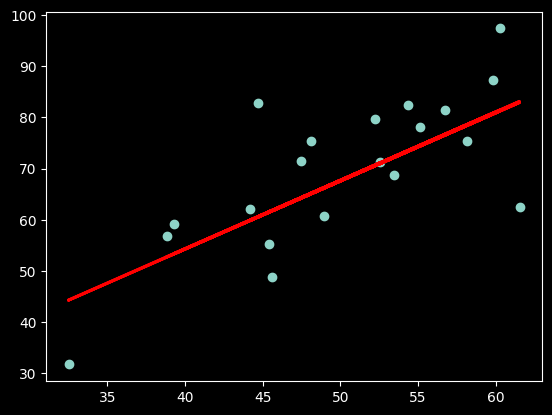

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def initialize(dim):
  w1 = np.random.rand(dim)
  w0 = np.random.rand()
  return w1, w0

def compute_cost(X, Y, y_hat):
    m = len(Y)
    cost = (1/(2*m)) * np.sum(np.square(y_hat - Y))
    return cost

def predict_y(X, w1, w0):
  # Handle both scalar w1 and vector w1
  return np.dot(X, w1) + w0

def update_parameters(X, Y, y_hat, cost, w0, w1, learning_rate):
  m = len(Y)
  # Calculate gradients
  db = np.sum(y_hat - Y) / m
  dw = np.dot(X.T, (y_hat - Y)) / m  # Transpose X for correct dot product shape

  w0_new = w0 - learning_rate * db
  w1_new = w1 - learning_rate * dw
  return w0_new, w1_new

def run_gradient_descent(X, Y, alpha, max_iterations, stopping_threshold=1e-6):
  dims = X.shape[1]
  w1, w0 = initialize(dims)
  previous_cost = None
  cost_history = np.zeros(max_iterations)

  for itr in range(max_iterations):
    y_hat = predict_y(X, w1, w0)
    cost = compute_cost(X, Y, y_hat)

    if previous_cost and abs(previous_cost - cost) <= stopping_threshold:
      break

    cost_history[itr] = cost
    previous_cost = cost
    w0, w1 = update_parameters(X, Y, y_hat, cost, w0, w1, alpha)

  return w0, w1, cost_history

# --- Data Loading ---
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape(-1, 1)

Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]).reshape(-1, 1)

# --- Execution ---
learning_rate = 0.0001
iterations = 10

w0, w1, cost_history = run_gradient_descent(X, Y, learning_rate, iterations)

print(f"Intercept (w0): {w0}")
print(f"Slope (w1): {w1}")

# Plotting the result
plt.scatter(X, Y)
plt.plot(X, predict_y(X, w1, w0), color='red')
plt.show()